## Ejericio para crear una red nueronal que aprenda a sumar, restar, dividir y multiplicar
Es un ejercicio extraido desde youtube, el link es el siguiente
https://www.youtube.com/watch?v=eZpSGS7vF5Y

- difundir
- compatir
- aprender
- hacer
- volver aprender

-> simpre busca la solución mas sencilla.

In [23]:
import numpy as np
import pandas as pd
import random
%matplotlib notebook

In [14]:
def get_random_ops(rows=100):
    data = []
    for i in range(0, rows):
        a = random.randint(1, 100)
        b = random.randint(1, 100)
        suma, resta, multi, divi = random.choice([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
        ])
        if suma == 1:
            y = a+b
        if resta == 1:
            y = a-b
        if multi == 1:
            y = a*b
        if divi == 1:
            y = a/b

        data.append({
            "a": a,
            "b": b,
            "suma": suma,
            "resta": resta,
            "multi": multi,
            "divi": divi,
            "y": round(y, 2)
        })
    return data

In [56]:
# paso 1
# data = pd.DataFrame(get_random_ops(rows=25000))
# paso 2
data = pd.DataFrame(get_random_ops(rows=1000000))
data[["a", "b", "suma", "resta", "multi", "divi", "y"]].head()

,a,b,suma,resta,multi,divi,y
0,11,80,0,0,1,0,880.00
1,19,86,0,1,0,0,-67.00
2,20,41,0,0,1,0,820.00
3,58,39,1,0,0,0,97.00
4,9,63,0,0,0,1,0.14


<IPython.core.display.Javascript object>


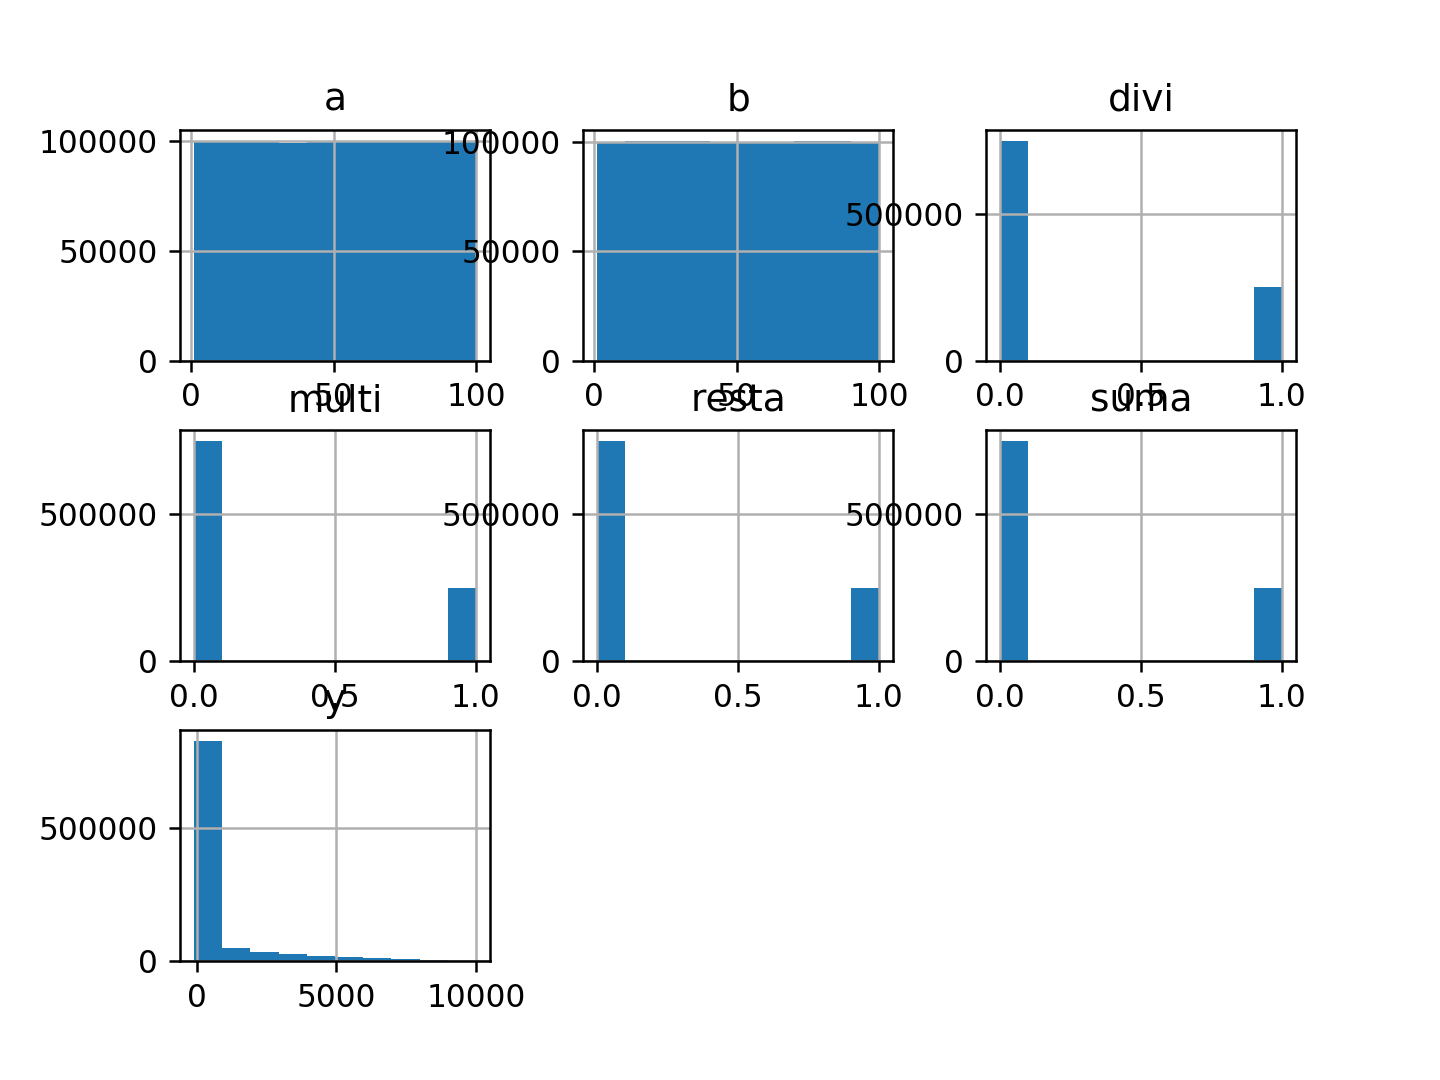

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023DDB81FB70>,
      dtype=object)

In [57]:
data.hist()

In [58]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    data[["a", "b", "suma", "resta", "multi", "divi"]], data["y"],
    test_size=0.30, random_state=42
)

In [60]:
model = MLPRegressor(
    # paso 1
    max_iter=800,
    # paso 2
    hidden_layer_sizes=(100, 100, 100),
    learning_rate_init=0.0001,
)
model.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=800, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [69]:
print(X_test.iloc[50])
print(y_test.iloc[50])
print(model.predict([X_test.iloc[50]]))

a        66
b        82
suma      0
resta     0
multi     1
divi      0
Name: 878902, dtype: int64
5412.0
[5408.49216864]


In [62]:
predict = model.predict(X_test)
print("Predict: %s" % list(predict[:5]))

Predict: [-0.6201254846352788, -3.880607851182473, -0.73221913467327, -46.6045716290092, 52.59924718909204]


In [63]:
data_check = pd.DataFrame(predict, columns=["predict"])
data_check["y"]=list(y_test)
data_check.set_index(["y"], drop=False, inplace=True)
data_check.sort_values(by=["y"], inplace=True)

<IPython.core.display.Javascript object>


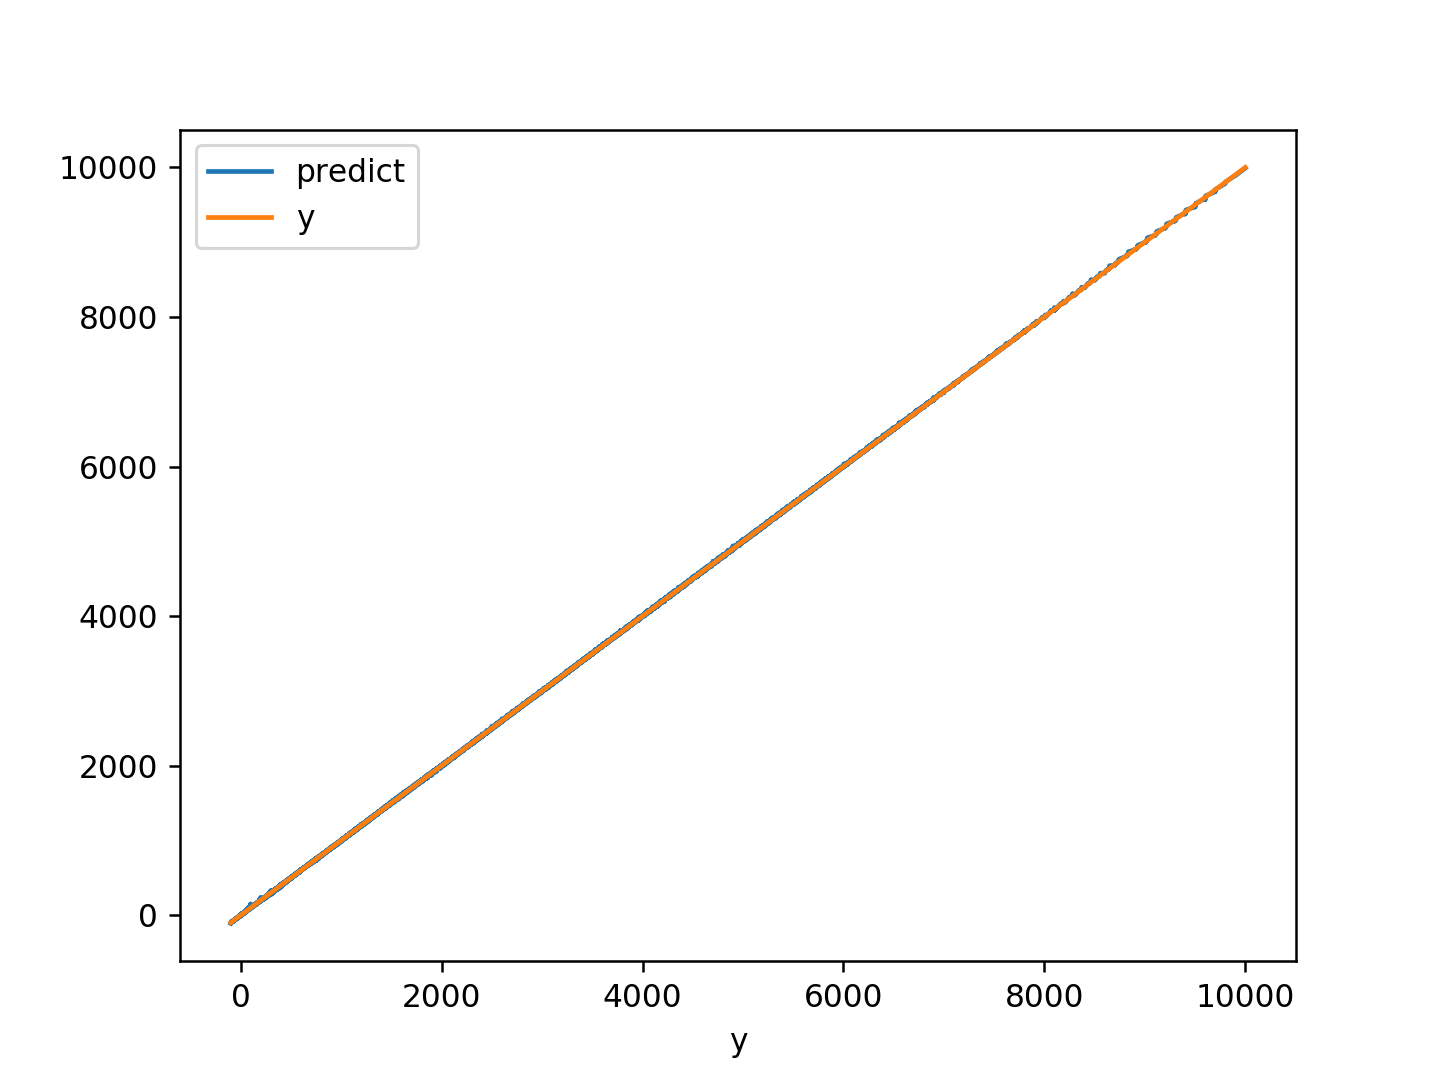

In [64]:
# paso con los 100.000 ejemplos y las tres neuronas.
data_check.plot()

In [ ]:
# paso 2